In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# The purpose of this notebook is to add as many features as we can imagine and see which ones are the most relevant

In [2]:
train = pd.read_csv('data/train_clean.csv')

## Transform attributes in numeric values

In [3]:
train.columns

Index(['CUST_COD', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'BIRTH_DATE',
       'PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL',
       'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'PAY_AMT_DEC', 'PAY_AMT_NOV',
       'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'DEFAULT PAYMENT JAN'],
      dtype='object')

### Drop CUST_COD

We won't use it, at the moment

In [4]:
train = train.drop(['CUST_COD'], axis=1)

## Transform SEX

In [5]:
train['SEX_MISSING'] = train['SEX'].isnull()*1      # Add a column to say if sex was missing or not
train.loc[train['SEX'].isnull(), 'SEX'] = 'F' # Predict sex with majority class
train['SEX'] = train['SEX'].apply(lambda x : 0 if x == 'M' else 1)   # Convert to M -> 0, F -> 1

## Transform EDUCATION

In [6]:
train['EDUCATION_MISSING'] = train['EDUCATION'].isnull() * 1 # Add a column to say if education was missing or not
train['EDUCATION'] = train['EDUCATION'].fillna('other')    # Predict missing values as other

train = pd.get_dummies(train, columns=['EDUCATION'])   # Get one hot vector for education

## Trasform MARRIAGE

In [7]:
train['MARRIAGE_MISSING'] = train['MARRIAGE'].isnull() * 1 # Add a column to say if education was missing or not
train['MARRIAGE'] = train['MARRIAGE'].fillna('other')    # Predict missing values as other
train = pd.get_dummies(train, columns=['MARRIAGE'])   # Get one hot vector for education

## Transform BIRTH_DATE

In [8]:
train['AGE_MISSING'] = train['BIRTH_DATE'].isnull() * 1

In [9]:
import datetime

birthdates = train['BIRTH_DATE']

def get_age(date):
    try:
        return (datetime.datetime.today() - datetime.datetime.strptime(date, '%d/%m/%Y')).days//365
    except Exception as e:
        return date

birthdates = birthdates.apply(get_age)

In [10]:
birthdates.describe()

count    26182.000000
mean        36.488160
std          9.201312
min         22.000000
25%         29.000000
50%         35.000000
75%         42.000000
max         76.000000
Name: BIRTH_DATE, dtype: float64

In [11]:
# Fill NA with mean value
birthdates = birthdates.fillna(36)

In [12]:
train['AGE'] = birthdates
train = train.drop(['BIRTH_DATE'], axis=1)

## Transform all columns in float

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 33 columns):
LIMIT_BAL                    26884 non-null float64
SEX                          26884 non-null int64
PAY_DEC                      26884 non-null int64
PAY_NOV                      26884 non-null int64
PAY_OCT                      26884 non-null int64
PAY_SEP                      26884 non-null int64
PAY_AUG                      26884 non-null int64
PAY_JUL                      26884 non-null int64
BILL_AMT_DEC                 26884 non-null float64
BILL_AMT_NOV                 26884 non-null float64
BILL_AMT_OCT                 26884 non-null float64
BILL_AMT_SEP                 26884 non-null float64
BILL_AMT_AUG                 26884 non-null float64
BILL_AMT_JUL                 26884 non-null float64
PAY_AMT_DEC                  26884 non-null float64
PAY_AMT_NOV                  26884 non-null float64
PAY_AMT_OCT                  26884 non-null float64
PAY_AMT_SEP          

In [14]:
train = train.astype('float64')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 33 columns):
LIMIT_BAL                    26884 non-null float64
SEX                          26884 non-null float64
PAY_DEC                      26884 non-null float64
PAY_NOV                      26884 non-null float64
PAY_OCT                      26884 non-null float64
PAY_SEP                      26884 non-null float64
PAY_AUG                      26884 non-null float64
PAY_JUL                      26884 non-null float64
BILL_AMT_DEC                 26884 non-null float64
BILL_AMT_NOV                 26884 non-null float64
BILL_AMT_OCT                 26884 non-null float64
BILL_AMT_SEP                 26884 non-null float64
BILL_AMT_AUG                 26884 non-null float64
BILL_AMT_JUL                 26884 non-null float64
PAY_AMT_DEC                  26884 non-null float64
PAY_AMT_NOV                  26884 non-null float64
PAY_AMT_OCT                  26884 non-null float64
PAY_AMT

# Use decision tree to evaluate variable importance

In [16]:
model = DecisionTreeClassifier()

X = train.drop(['DEFAULT PAYMENT JAN'], axis=1)
y = train['DEFAULT PAYMENT JAN']

model = model.fit(X, y)
predictions = model.predict(X)

In [17]:
print("Train accuracy decision tree: {0}".format(accuracy_score(y, predictions)))

Train accuracy decision tree: 0.9995908346972177


<Container object of 32 artists>

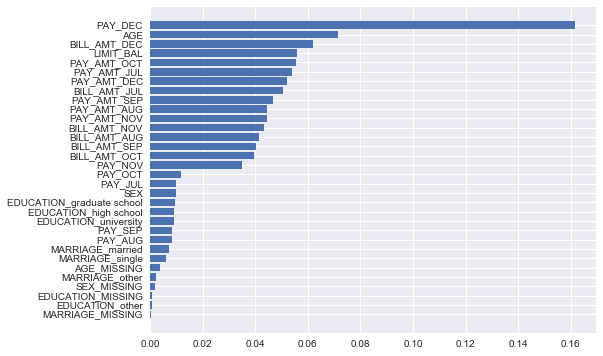

In [18]:
feature_importances = [(x, y) for x,y in zip(model.feature_importances_, X.columns.values)]

feature_importances.sort(key = lambda x : x[0])
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), [x[0] for x in feature_importances], tick_label = [x[1] for x in feature_importances])

<Container object of 32 artists>

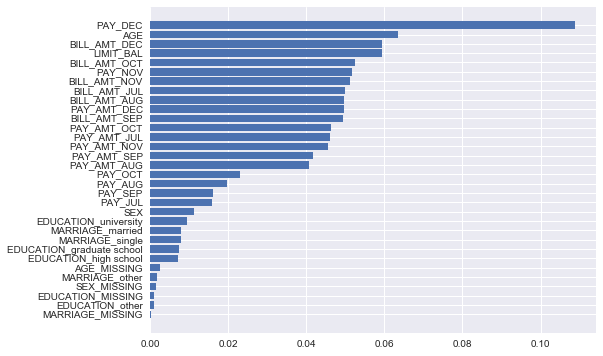

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model = model.fit(X, y)

predictions = model.predict(X)

feature_importances = [(x, y) for x,y in zip(model.feature_importances_, X.columns.values)]

feature_importances.sort(key = lambda x : x[0])
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), [x[0] for x in feature_importances], tick_label = [x[1] for x in feature_importances])

In [20]:
print("Train accuracy of random forest: {0}".format(accuracy_score(y, predictions)))

Train accuracy of random forest: 0.9800624907007885


# Insert additional features

## Mean value and trend for PAY_X

In [21]:
pay_cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']

def avg_payments(columns):
    def ret(x):
        retval = 0
        for c in columns:
            retval += x[c]
        return retval / len(columns)
    return ret

for i in range(-2, -7, -1):
    train['AVG_PAY_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(pay_cols[i:]), axis=1)

In [22]:
def get_trend(y):
    N = len(y)
    x = range(N)
    B = (sum(x[i] * y[i] for i in range(N)) - 1./N*sum(x)*sum(y)) / (sum(x[i]**2 for i in range(N)) - 1./N*sum(x)**2)
    return B
    
def get_col_trend(cols):
    def get_cols(x):
        return get_trend([v for v in x.loc[cols]])
    return get_cols

train['PAY_TREND'] = train.apply(get_col_trend(pay_cols), axis=1)

## Mean value and trend for BILL_AMT_X

In [23]:
bill_amt_cols = ['BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP', 'BILL_AMT_OCT', 'BILL_AMT_NOV', 'BILL_AMT_DEC']

for i in range(-2, -7, -1):
    train['AVG_BILL_AMT_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(bill_amt_cols[i:]), axis=1)

In [24]:
train['BILL_AMT_TREND'] = train.apply(get_col_trend(bill_amt_cols), axis=1)

## Mean value and trend for PAY_AMT_X

In [25]:
pay_amt_cols = ['PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP', 'PAY_AMT_OCT', 'PAY_AMT_NOV', 'PAY_AMT_DEC']

for i in range(-2, -7, -1):
    train['AVG_PAY_AMT_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(pay_amt_cols[i:]), axis=1)
train['PAY_AMT_TREND'] = train.apply(get_col_trend(pay_amt_cols), axis=1)

## Delta AMT

In [26]:
for i in range(1, 6):
    train['DELTA_{0}'.format(i)] = train.apply(lambda x : x.loc[bill_amt_cols[i]] - x.loc[bill_amt_cols[i-1]], axis=1)

# Insert product of trends

In [27]:
train['PROD'] = train.apply(lambda x : x['PAY_AMT_TREND'] * x['BILL_AMT_TREND'], axis=1)

# Insert payment percentage

In [28]:
for i in range(1, 6):
    train['FRAC_PAY_{0}'.format(i)] = train.apply(lambda x : x.loc[pay_amt_cols[i]] / x.loc[bill_amt_cols[i-1]] if x.loc[bill_amt_cols[i-1]] != 0 else 0, axis=1)
    

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 62 columns):
LIMIT_BAL                    26884 non-null float64
SEX                          26884 non-null float64
PAY_DEC                      26884 non-null float64
PAY_NOV                      26884 non-null float64
PAY_OCT                      26884 non-null float64
PAY_SEP                      26884 non-null float64
PAY_AUG                      26884 non-null float64
PAY_JUL                      26884 non-null float64
BILL_AMT_DEC                 26884 non-null float64
BILL_AMT_NOV                 26884 non-null float64
BILL_AMT_OCT                 26884 non-null float64
BILL_AMT_SEP                 26884 non-null float64
BILL_AMT_AUG                 26884 non-null float64
BILL_AMT_JUL                 26884 non-null float64
PAY_AMT_DEC                  26884 non-null float64
PAY_AMT_NOV                  26884 non-null float64
PAY_AMT_OCT                  26884 non-null float64
PAY_AMT

In [30]:
train['LIMIT_BAL'] = pd.qcut(train['LIMIT_BAL'], q=5, labels=[1, 2, 3, 4, 5])

In [31]:
train['AGE'] = pd.qcut(train['AGE'], q=4, labels=[1, 2, 3, 4])

In [16]:
avg_pay_last = ['AVG_PAY_LAST_2', 'AVG_PAY_LAST_3', 'AVG_PAY_LAST_4', 'AVG_PAY_LAST_5', 'AVG_PAY_LAST_6']

for c in pay_cols:
    train[c] = pd.cut(train[c], bins=[-2, -1, 0, 2, 8], labels=[-2, -1, 0, 1, 2])
for c in avg_pay_last:
    train[c] = pd.cut(train[c], bins=[-2, -1, 0, 2, 8], labels=[-2, -1, 0, 1, 2])

NameError: name 'pay_cols' is not defined

In [33]:
train = pd.get_dummies(train, columns=pay_cols + avg_pay_last)

# Add total amount paid back

In [34]:
train['TOTAL_AMT_PAID'] = train['PAY_AMT_JUL'] + train['PAY_AMT_AUG'] + train['PAY_AMT_SEP'] + train['PAY_AMT_OCT'] + train['PAY_AMT_NOV'] + train['PAY_AMT_DEC']

In [35]:
for i in train.columns:
    train[i] = train[i].astype('float32')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 85 columns):
LIMIT_BAL                     26884 non-null float32
SEX                           26884 non-null float32
BILL_AMT_DEC                  26884 non-null float32
BILL_AMT_NOV                  26884 non-null float32
BILL_AMT_OCT                  26884 non-null float32
BILL_AMT_SEP                  26884 non-null float32
BILL_AMT_AUG                  26884 non-null float32
BILL_AMT_JUL                  26884 non-null float32
PAY_AMT_DEC                   26884 non-null float32
PAY_AMT_NOV                   26884 non-null float32
PAY_AMT_OCT                   26884 non-null float32
PAY_AMT_SEP                   26884 non-null float32
PAY_AMT_AUG                   26884 non-null float32
PAY_AMT_JUL                   26884 non-null float32
DEFAULT PAYMENT JAN           26884 non-null float32
SEX_MISSING                   26884 non-null float32
EDUCATION_MISSING             26884 non-nul

In [37]:
from sklearn.preprocessing import RobustScaler

columns = train.columns
scaler = RobustScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=columns)

# Run feature importance again

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

X = train.drop(['DEFAULT PAYMENT JAN'], axis=1)
y = train['DEFAULT PAYMENT JAN']

scores = cross_val_score(model, X, y, cv=5)
print(scores)

[ 0.80732751  0.80825739  0.81253487  0.81383671  0.81026786]


In [39]:
print(sum(scores) / 5)

0.81044486769


<Container object of 84 artists>

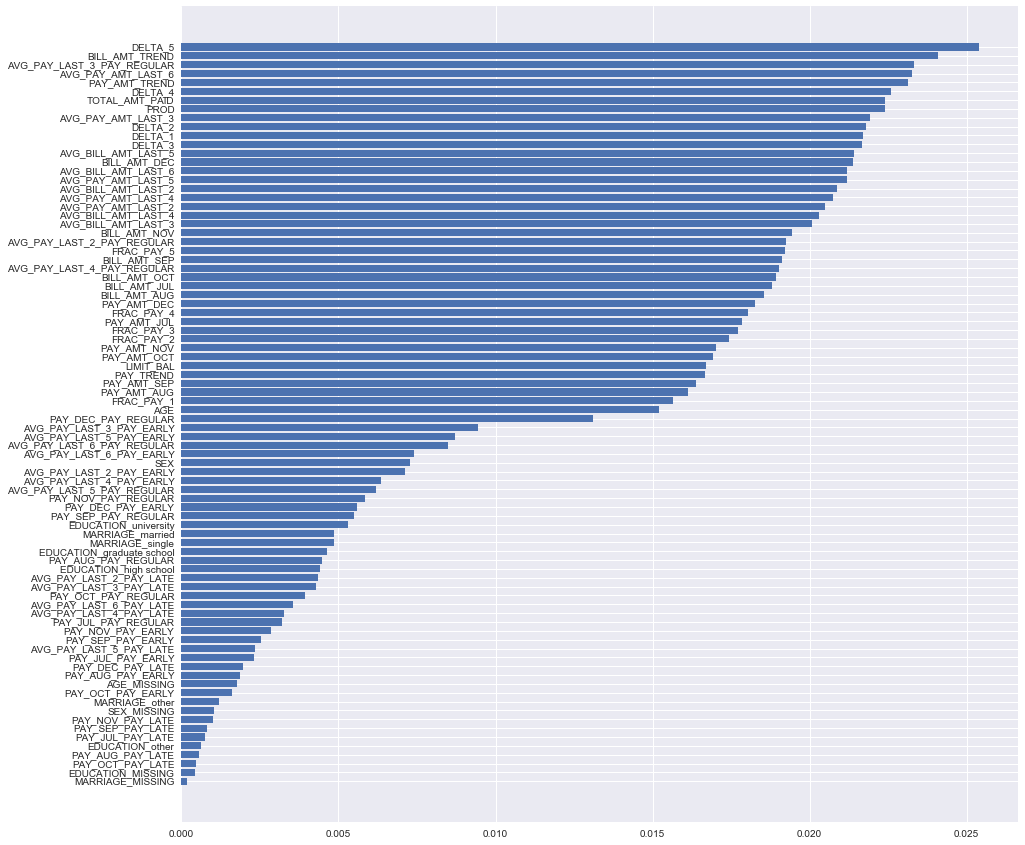

In [40]:
model = model.fit(X, y)
feature_importances = [(x, y) for x,y in zip(model.feature_importances_, X.columns.values)]

feature_importances.sort(key = lambda x : x[0])
plt.figure(figsize=(15, 15))
plt.barh(range(len(feature_importances)), [x[0] for x in feature_importances], tick_label = [x[1] for x in feature_importances])

# Drop last 10 columns and run again

In [241]:
least_important_columns = [x for _,x in feature_importances[:10]]
print('\n'.join(least_important_columns))

MARRIAGE_MISSING
PAY_SEP_PAY_LATE
PAY_OCT_PAY_LATE
EDUCATION_MISSING
PAY_AUG_PAY_LATE
EDUCATION_other
PAY_NOV_PAY_LATE
PAY_JUL_PAY_LATE
SEX_MISSING
MARRIAGE_other


In [242]:
X_1 = X.drop(least_important_columns, axis=1)

In [243]:
model_1 = RandomForestClassifier(n_estimators=100)
scores_1 = cross_val_score(model_1, X_1, y, cv=5)
print(scores_1)

[ 0.80621164  0.80844337  0.81606844  0.80993119  0.81436012]


In [246]:
print(sum(scores_1) / 5)

0.811002951836


In [247]:
model_1 = model_1.fit(X_1, y)

<Container object of 74 artists>

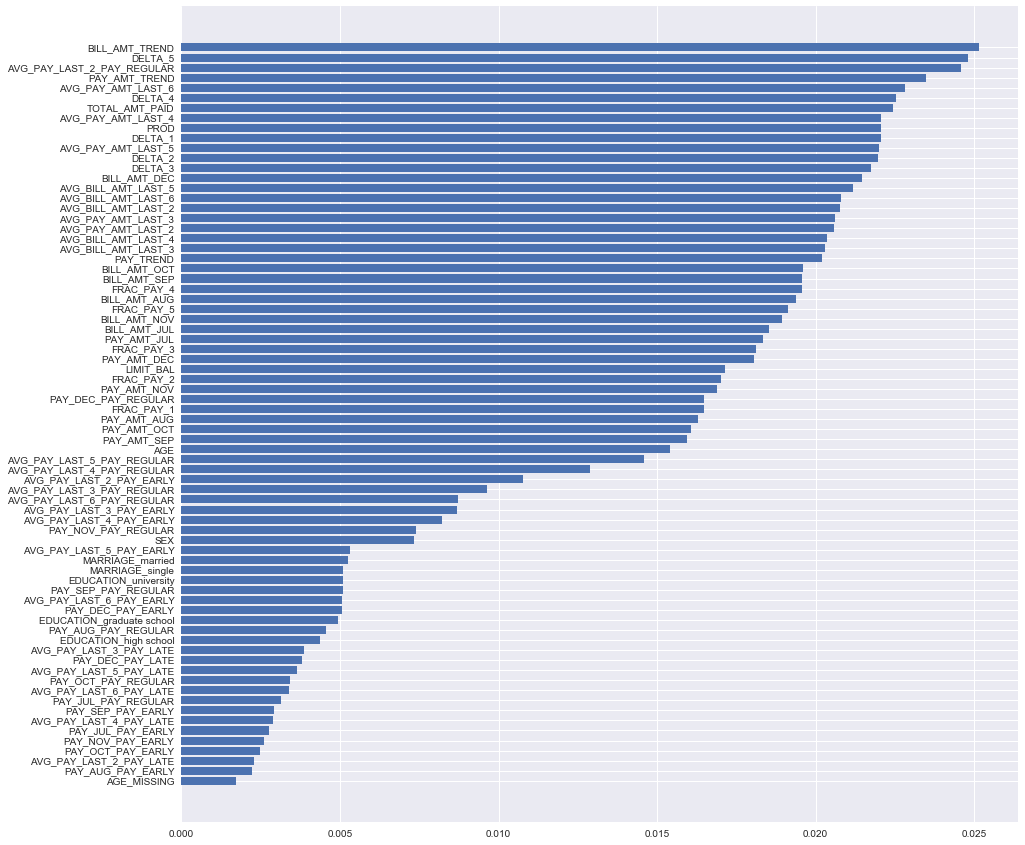

In [248]:
feature_importances_1 = [(x, y) for x,y in zip(model_1.feature_importances_, X_1.columns.values)]
feature_importances_1.sort(key = lambda x : x[0])

plt.figure(figsize=(15, 15))
plt.barh(range(len(feature_importances_1)), [x[0] for x in feature_importances_1], tick_label = [x[1] for x in feature_importances_1])

# Drop last 5 columns and run again

In [249]:
least_important_columns_2 = [x for _,x in feature_importances_1[:5]]
print('\n'.join(least_important_columns_2))

AGE_MISSING
PAY_AUG_PAY_EARLY
AVG_PAY_LAST_2_PAY_LATE
PAY_OCT_PAY_EARLY
PAY_NOV_PAY_EARLY


In [250]:
X_2 = X_1.drop(least_important_columns_2, axis=1)

In [251]:
model_2 = RandomForestClassifier(n_estimators=100)
scores_2 = cross_val_score(model_2, X_2, y, cv=5)
print(scores_2)

[ 0.80546773  0.80565371  0.81495258  0.81234889  0.80840774]


In [252]:
print(sum(scores_2) / 5)

0.8093661301


# Use RECURSIVE FEATURE ELIMINATION

In [130]:
train_small = train.sample(1000)

X_small = train_small.drop(['DEFAULT PAYMENT JAN'], axis=1)
y_small = train_small['DEFAULT PAYMENT JAN']

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [117]:
from sklearn.preprocessing import StandardScaler
X_small = StandardScaler().fit_transform(X_small)

In [44]:
X = train.drop(['DEFAULT PAYMENT JAN'], axis=1)
y = train['DEFAULT PAYMENT JAN']

In [46]:
mod = RandomForestClassifier(n_estimators=300)

In [47]:
rfecv = RFECV(estimator=mod, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=1)

In [48]:
rfecv.fit(X, y)

Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 fe

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=1)

Optimal number of features : 72


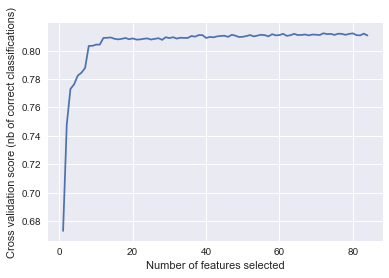

In [49]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 29


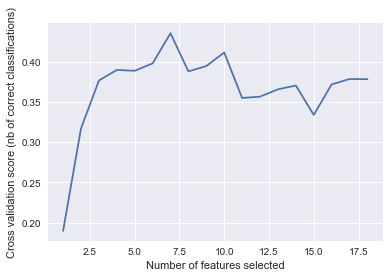

In [135]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [51]:
X.columns[rfecv.get_support()]

Index(['LIMIT_BAL', 'SEX', 'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT',
       'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'PAY_AMT_DEC',
       'PAY_AMT_NOV', 'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_single', 'AGE',
       'PAY_TREND', 'AVG_BILL_AMT_LAST_2', 'AVG_BILL_AMT_LAST_3',
       'AVG_BILL_AMT_LAST_4', 'AVG_BILL_AMT_LAST_5', 'AVG_BILL_AMT_LAST_6',
       'BILL_AMT_TREND', 'AVG_PAY_AMT_LAST_2', 'AVG_PAY_AMT_LAST_3',
       'AVG_PAY_AMT_LAST_4', 'AVG_PAY_AMT_LAST_5', 'AVG_PAY_AMT_LAST_6',
       'PAY_AMT_TREND', 'DELTA_1', 'DELTA_2', 'DELTA_3', 'DELTA_4', 'DELTA_5',
       'PROD', 'FRAC_PAY_1', 'FRAC_PAY_2', 'FRAC_PAY_3', 'FRAC_PAY_4',
       'FRAC_PAY_5', 'PAY_JUL_PAY_EARLY', 'PAY_JUL_PAY_REGULAR',
       'PAY_AUG_PAY_REGULAR', 'PAY_SEP_PAY_EARLY', 'PAY_SEP_PAY_REGULAR',
       'PAY_OCT_PAY_EARLY', 'PAY_OCT_PAY_REGULAR', 'PAY_NOV_PA

In [53]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=300)
X_compr = train.loc[:, X.columns[rfecv.get_support()]]
scores = cross_val_score(rf, X_compr, y, cv=5)

In [140]:
print(scores)

[ 0.80751348  0.80881532  0.81365073  0.81216292  0.81045387]


In [141]:
np.mean(scores)

0.81051926553353337

In [96]:
X_reduct = train.loc[:, ['SEX_MISSING',
'PAY_JUL_PAY_REGULAR',
'PAY_JUL_PAY_LATE',
'PAY_AUG_PAY_EARLY',
'PAY_AUG_PAY_REGULAR',
'PAY_AUG_PAY_LATE',
'PAY_SEP_PAY_EARLY',
'PAY_SEP_PAY_LATE',
'PAY_OCT_PAY_LATE',
'PAY_NOV_PAY_EARLY',
'PAY_NOV_PAY_REGULAR',
'PAY_NOV_PAY_LATE',
'PAY_DEC_PAY_REGULAR',
'PAY_DEC_PAY_LATE',
'AVG_PAY_LAST_2_PAY_EARLY',
'AVG_PAY_LAST_2_PAY_REGULAR',
'AVG_PAY_LAST_2_PAY_LATE',
'AVG_PAY_LAST_3_PAY_LATE',
'AVG_PAY_LAST_4_PAY_EARLY',
'AVG_PAY_LAST_5_PAY_EARLY',
'AVG_PAY_LAST_5_PAY_REGULAR',
'AVG_PAY_LAST_5_PAY_LATE',
'AVG_PAY_LAST_6_PAY_REGULAR',
'AVG_PAY_LAST_6_PAY_LATE']]

In [100]:
m = RandomForestClassifier(n_estimators=300, n_jobs=-1)
scores = cross_val_score(model, X_reduct, y, cv=5)

In [101]:
scores

array([ 0.80676957,  0.81402269,  0.81513855,  0.81272085,  0.81156994])

In [102]:
sum(scores)/5

0.81204432099462431

In [54]:
rf = RandomForestClassifier()

In [55]:
rf?

In [56]:
rf.predict = lambda x : np.array([1 if t[1] > 0.3 else 0 for t in rf.predict_proba(x)])

(26884, 84)